## Các biến giá trị trong mô hình Black - Scholes - Merton

Mô hình Black – Scholes dựa trên ý tưởng thiết lập một danh mục đầu tư bao gồm tài sản cơ sở và tài sản phi rủi ro có dòng tiền bằng dòng tiền của quyền chọn đang cần thẩm định giá; do đó, chi phí cũng bằng nhau. 
Giá trị quyền chọn mua trong mô hình này được viết dưới dạng một hàm của 5 biến số và được xác định bởi công thức:

Giá trị quyền chọn mua = S*N(d1) – K*e^(-rt)*N(d2)
Trong đó,
S: Giá trị hiện tại của tài sản cơ sở; 
K: Giá trị thực hiện của quyền chọn; 
t: Thời hạn hiệu lực còn lại của quyền chọn; 
r: Lãi suất phi rủi ro ứng với kỳ hạn t;
σ2: Phương sai ln (giá trị) tài sản cơ sở;
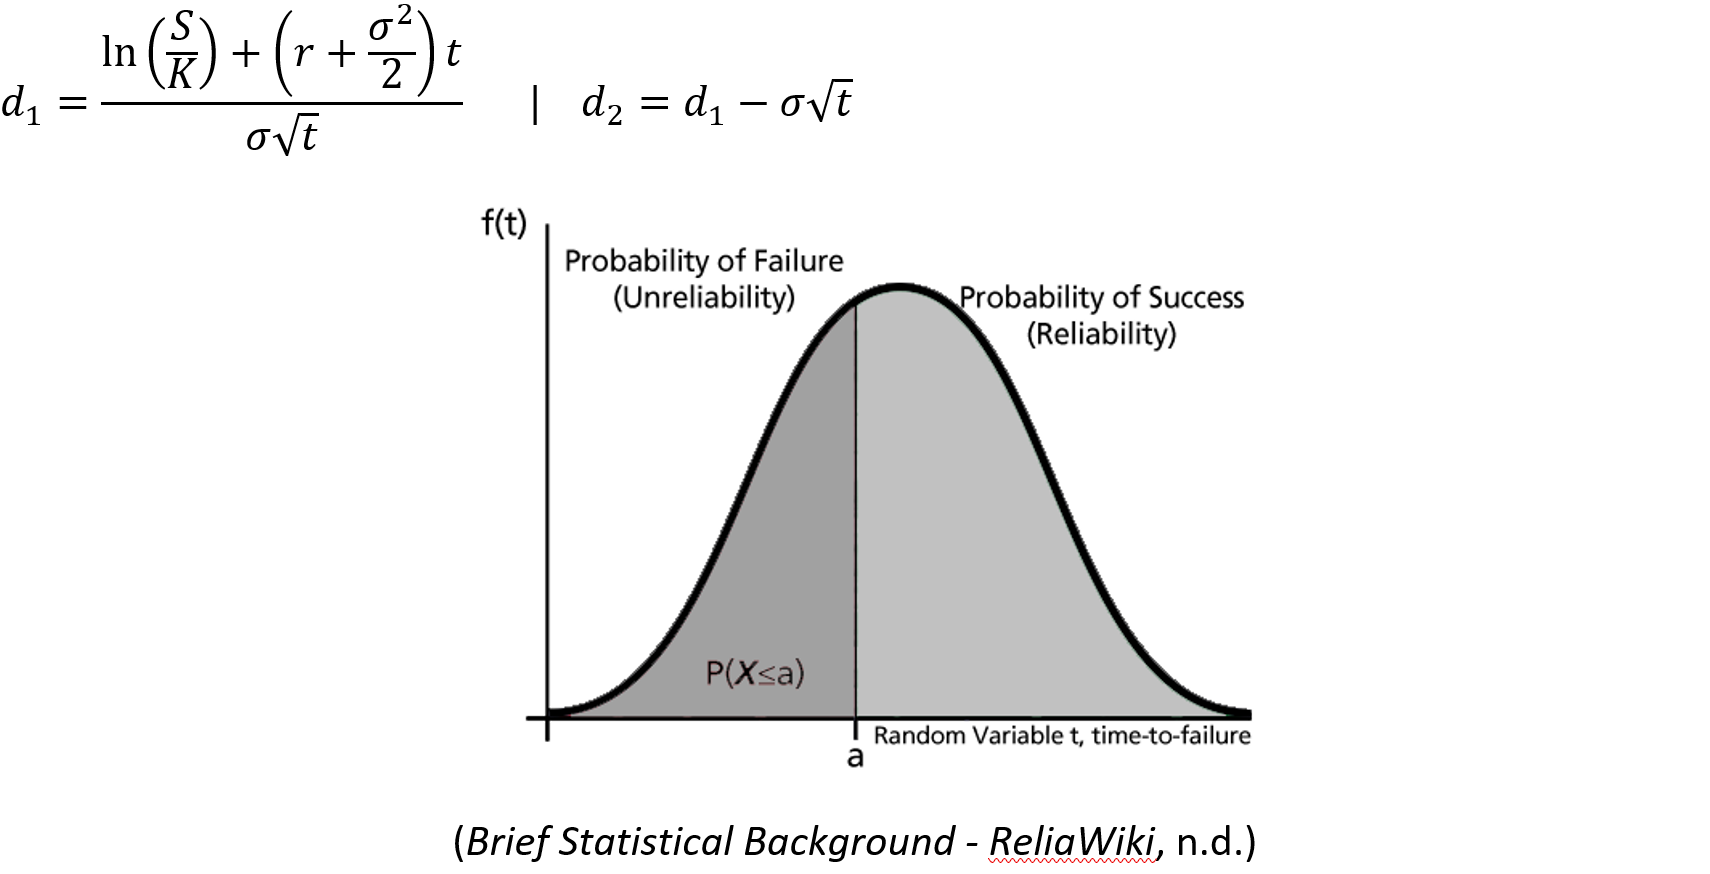

N(d1) và N(d2) là hai xác suất, được tính bằng cách sử dụng phân phối tích lũy chuẩn tắc. Hai xác suất trên cho biết khả năng một quyền chọn mang lại dòng tiền dương cho người sở hữu quyền chọn tại thời điểm thực hiện (tương đương với S > K đối với quyền chọn mua và K > S đối với quyền chọn bán).

=>> Cụ thể: N(d1) cho biết xác suất xảy ra đối với dòng thu nhập kỳ vọng và N(d2) cho biết xác suất đối với chi phí thực hiện.

Nguồn:

[Options, Futures, and Other Derivatives, 10th Edition](https://www.pearson.com/us/higher-education/program/Hull-Options-Futures-and-Other-Derivatives-10th-Edition/PGM333301.html) by John C. Hull.

[Black-Scholes Model](https://www.investopedia.com/terms/b/blackscholes.asp) by Adam Hayes from Investopedia.com

In [2]:
from math import log,e
from scipy import stats
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams.update({'font.size': 16})

In [4]:
def black_scholes_merton(stock_price, strike_price, rate, time, volatility, dividend=0.0):
    
    '''Hàm ước tính giá trị của quyền chọn mua và quyền chọn bán bằng Mô hình Black Scholes Merton.
  
  Parameters
  ----------
  stock_price: Giá trị thị trường giao ngay của chứng khoán cơ sở
  strike_price: Giá thực hiện của hợp đồng quyền chọn
  risk_free_rate: Lãi suất phi rủi ro
  time: Thời gian đến khi đáo hạn của hợp đồng quyền chọn
  volatility: Độ lệch chuẩn trong tỷ suất sinh lợi ghép lãi liên tục của cổ phiếu
  dividend: Cổ tức hoặc lợi tức của tài sản, với giá trị mặc định là 0

  Returns
  -------
  [call,put]: Quyền chọn mua hoặc quyền chọn bán, và giá trị giao dịch của hợp đồng quyền chọn
  '''
    d1 = (log(stock_price/strike_price) + (rate - dividend + volatility**2/2) * time)/(volatility * time**.5)
    d2 = d1 - volatility * time**.5

    call = stats.norm.cdf(d1) * stock_price*e**(-dividend*time) - stats.norm.cdf(d2)*strike_price*e**(-rate*time)
    put = stats.norm.cdf(-d2)*strike_price*e**(-rate * time) - stats.norm.cdf(-d1) * stock_price*e**(-dividend*time)
    
    return [call, put]

In [5]:
help(black_scholes_merton)

Help on function black_scholes_merton in module __main__:

black_scholes_merton(stock_price, strike_price, rate, time, volatility, dividend=0.0)
    Hàm ước tính giá trị của quyền chọn mua và quyền chọn bán bằng Mô hình Black Scholes Merton.
    
    Parameters
    ----------
    stock_price: Giá trị thị trường giao ngay của chứng khoán cơ sở
    strike_price: Giá thực hiện của hợp đồng quyền chọn
    risk_free_rate: Lãi suất phi rủi ro
    time: Thời gian đến khi đáo hạn của hợp đồng quyền chọn
    volatility: Độ lệch chuẩn trong tỷ suất sinh lợi ghép lãi liên tục của cổ phiếu
    dividend: Cổ tức hoặc lợi tức của tài sản, với giá trị mặc định là 0
    
    Returns
    -------
    [call,put]: Quyền chọn mua hoặc quyền chọn bán, và giá trị giao dịch của hợp đồng quyền chọn



In [6]:
black_scholes_merton(105,100,.05,1,.25,.01)

[14.932243162306307, 6.099953068715067]

## Giá trị thị trường giao ngay của chứng khoán cơ sở (Giá cổ phiếu)

In [7]:
stock_price, strike_price = 100, 100

if strike_price < stock_price:
  print('The call option is in-the-money and the put option is out-of-the-money.')
elif strike_price > stock_price:
  print('The call option is out-of-the-money and the put option is in-the-money.')
else:
  print('The options are at-the-money.')

The options are at-the-money.


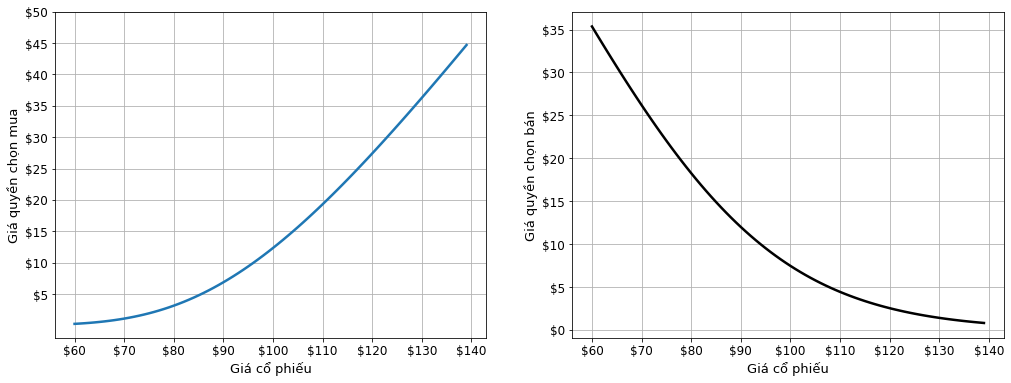

In [10]:
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(range(60,140),[black_scholes_merton(x1,100,.05,1,.25)[0] for x1 in range(60,140)],lw=2.5)
plt.yticks(range(5,55,5),['$'+str(i) for i in range(5,55,5)], size=12)
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)], size=12)
plt.xlabel('Giá cổ phiếu', size=13)
plt.ylabel('Giá quyền chọn mua', size=13)
plt.grid();

plt.subplot(1,2,2)
plt.plot(range(60,140),[black_scholes_merton(x2,100,.05,1,.25)[1] for x2 in range(60,140)],lw=2.5,color='black')
plt.yticks(range(0,40,5),['$'+str(i) for i in range(0,40,5)], size=12)
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)], size=12)
plt.xlabel('Giá cổ phiếu', size=13)
plt.ylabel('Giá quyền chọn bán', size=13)
plt.grid();

## Giá thực hiện của hợp đồng quyền chọn

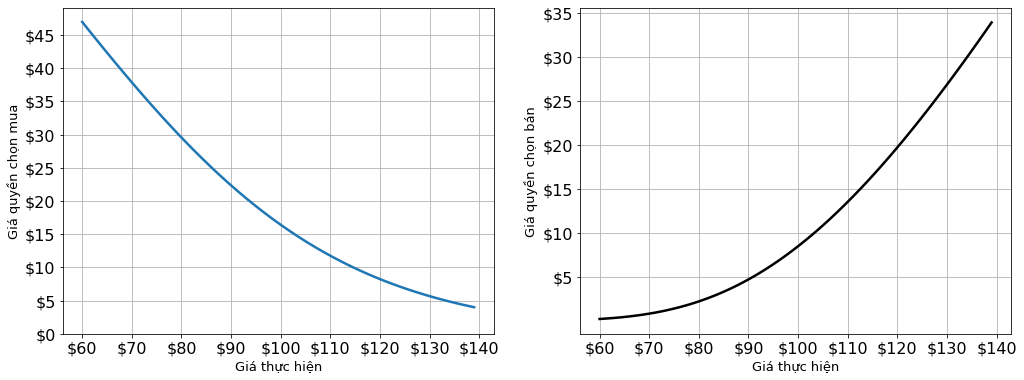

In [31]:
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(range(60,140),[black_scholes_merton(105,x1,.03,1,.3)[0] for x1 in range(60,140)],lw=2.5)
plt.yticks(range(0,50,5),['$'+str(i) for i in range(0,50,5)])
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)])
plt.xlabel('Giá thực hiện', size=13)
plt.ylabel('Giá quyền chọn mua', size=13)
plt.grid();

plt.subplot(1,2,2)
plt.plot(range(60,140),[black_scholes_merton(105,x2,.03,1,.3)[1] for x2 in range(60,140)],lw=2.5, color='black')
plt.yticks(range(5,40,5),['$'+str(i) for i in range(5,40,5)])
plt.xticks(range(60,150,10),['$'+str(i) for i in range(60,150,10)])
plt.xlabel('Giá thực hiện', size=13)
plt.ylabel('Giá quyền chọn bán', size=13)
plt.grid();

## Độ lệch chuẩn trong tỷ suất sinh lợi ghép lãi liên tục của cổ phiếu

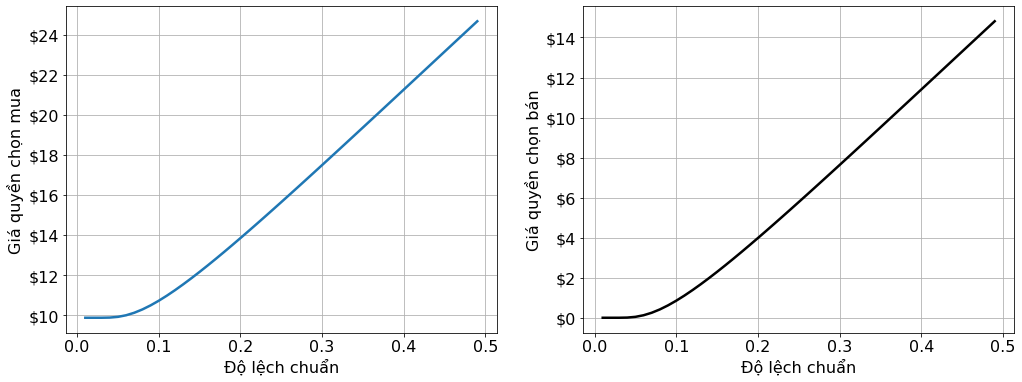

In [47]:
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(np.arange(.01,.5,.01),[black_scholes_merton(105,100,.05,1,x)[0] for x in np.arange(.01,.5,.01)],lw=2.5)
plt.yticks(range(10,26,2),['$'+str(i) for i in range(10,26,2)])
plt.xlabel('Độ lệch chuẩn')
plt.ylabel('Giá quyền chọn mua')
plt.grid();

plt.subplot(1,2,2)
plt.plot(np.arange(.01,.5,.01),[black_scholes_merton(105,100,.05,1,x)[1] for x in np.arange(.01,.5,.01)],lw=2.5,color='black')
plt.yticks(range(0,16,2),['$'+str(i) for i in range(0,16,2)])
plt.xlabel('Độ lệch chuẩn')
plt.ylabel('Giá quyền chọn bán')
plt.grid();

## Thời gian đến khi đáo hạn của hợp đồng quyền chọn

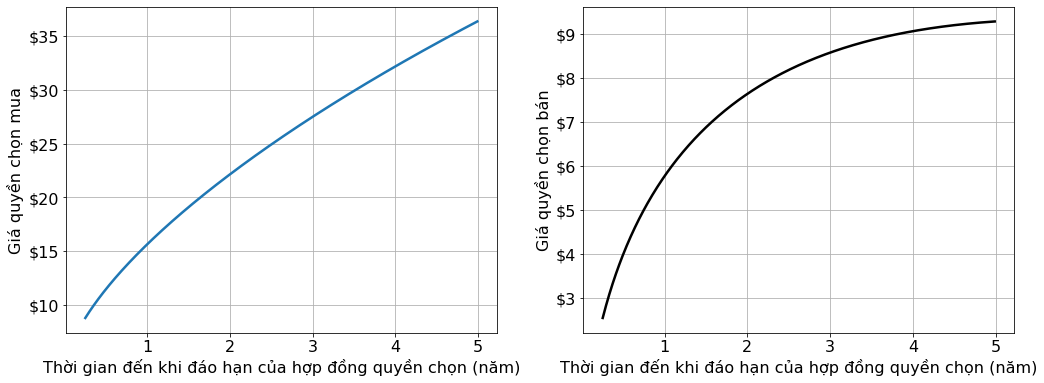

In [52]:
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(np.arange(.25,5,.01),[black_scholes_merton(105,100,.05,x,.25)[0] for x in np.arange(.25,5,.01)],lw=2.5)
plt.yticks(range(10,40,5),['$'+str(i) for i in range(10,40,5)])
plt.xlabel('Thời gian đến khi đáo hạn của hợp đồng quyền chọn (năm)')
plt.ylabel('Giá quyền chọn mua')
plt.grid();

plt.subplot(1,2,2)
plt.plot(np.arange(.25,5,.01),[black_scholes_merton(105,100,.05,x,.25)[1] for x in np.arange(.25,5,.01)],lw=2.5,color='black')
plt.yticks(range(3,10,1),['$'+str(i) for i in range(3,10,1)])
plt.xlabel('Thời gian đến khi đáo hạn của hợp đồng quyền chọn (năm)')
plt.ylabel('Giá quyền chọn bán')
plt.grid();

## Lãi suất phi rủi ro


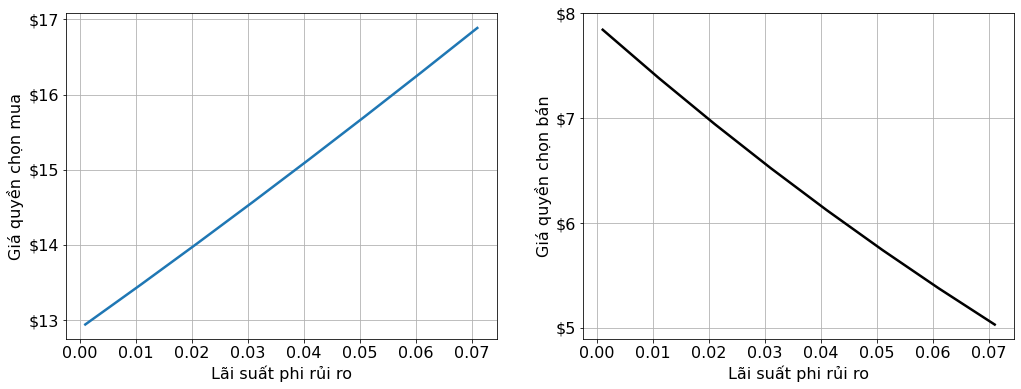

In [56]:
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(np.arange(.001,.075,.01),[black_scholes_merton(105,100,x,1,.25)[0] for x in np.arange(.001,.075,.01)],lw=2.5)
plt.yticks(range(13,18,1),['$'+str(i) for i in range(13,18,1)])
plt.xlabel('Lãi suất phi rủi ro')
plt.ylabel('Giá quyền chọn mua')
plt.grid();

plt.subplot(1,2,2)
plt.plot(np.arange(.001,.075,.01),[black_scholes_merton(105,100,x,1,.25)[1] for x in np.arange(.001,.075,.01)],lw=2.5,color='black')
plt.yticks(range(5,9,1),['$'+str(i) for i in range(5,9,1)])
plt.xlabel('Lãi suất phi rủi ro')
plt.ylabel('Giá quyền chọn bán')
plt.grid();

##  Suất sinh lợi của tài sản cơ sở (Cổ tức)


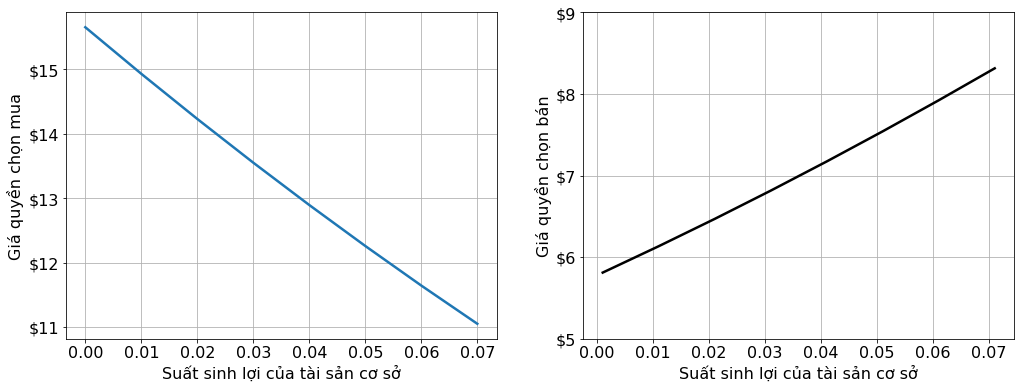

In [60]:
plt.figure(figsize = (17,6))
plt.subplot(1,2,1)
plt.plot(np.arange(0.0,.075,.01),[black_scholes_merton(105,100,.05,1,.25,x)[0] for x in np.arange(0.0,.075,.01)],lw=2.5)
plt.yticks(range(11,16,1),['$'+str(i) for i in range(11,16,1)])
plt.xlabel('Suất sinh lợi của tài sản cơ sở')
plt.ylabel('Giá quyền chọn mua')
plt.grid();

plt.subplot(1,2,2)
plt.plot(np.arange(.001,.075,.01),[black_scholes_merton(105,100,.05,1,.25,x)[1] for x in np.arange(.001,.075,.01)],lw=2.5,color='black')
plt.yticks(range(5,10,1),['$'+str(i) for i in range(5,10,1)])
plt.xlabel('Suất sinh lợi của tài sản cơ sở')
plt.ylabel('Giá quyền chọn bán')
plt.grid();

## Comparing the Black Scholes Merton Model to the live market


In [22]:
def annualized_days(date1, date2):
  return (date2 - date1).days/365

In [23]:
apple_call, apple_put = black_scholes_merton(161.94,160,.001,annualized_days(date.today(),date(2022,2,18)),.2888,.0055)


In [24]:
print(f'Black Scholes Merton Model value for a European Apple Option Call: {apple_call:.2f}\nBlack Scholes value for a European Apple Option Put: {apple_put:.2f}')


Black Scholes Merton Model value for a European Apple Option Call: 1.18+14.16j
Black Scholes value for a European Apple Option Put: -1.18+14.16j
